# Importing Builtin Assets
All of Menpo's Input/Output functionality is stored in the `io` package. We frequently import this package as `mio`

In [1]:
import menpo.io as mio

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Menpo has a small cache of test assets shipped with it for example and testing purposes. You can get the filepath of this folder on your system easily

In [2]:
data_dir = mio.data_dir_path()
print('Shipped data is at {}'.format(data_dir))
import os
os.listdir(str(data_dir))

Shipped data is at /home/ea1812/Documents/menpo/menpo/data


['breakingbad.jpg',
 'logos',
 'menpo_thumbnail.jpg',
 'takeo.pts',
 'breakingbad.pts',
 'einstein.pts',
 'takeo.ppm',
 'einstein.jpg',
 'lenna.ljson',
 'tongue.pts',
 'tongue.jpg',
 'lenna.png']

A convienience function is provided in the `io` package to make life easier. Note that it skips folders (e.g. `logos`).

In [3]:
builtin_assets = mio.ls_builtin_assets()
print(builtin_assets)

['breakingbad.jpg', 'menpo_thumbnail.jpg', 'takeo.pts', 'breakingbad.pts', 'einstein.pts', 'takeo.ppm', 'einstein.jpg', 'lenna.ljson', 'tongue.pts', 'tongue.jpg', 'lenna.png']


`data_path_to(filename)` can be used to get a path to examples from the folder. For instance, let's say you want to get a path to the `einstein.jpg` file... 

In [4]:
einstein_path = mio.data_path_to('einstein.jpg')
print('Einstein lives at {}'.format(einstein_path))

Einstein lives at /home/ea1812/Documents/menpo/menpo/data/einstein.jpg


The 6 `menpo.io` importing functions can be broken into two groups


*Single asset importers*

- `import_image`
- `import_landmark_file`
- `import_builtin_asset`
- `import_pickle`


*Multi asset importers*

- `import_images`
- `import_landmark_files`
- `import_pickles`

**Single Asset Importers**

Let's start by seeing how the basic single importers work. How about provided images?

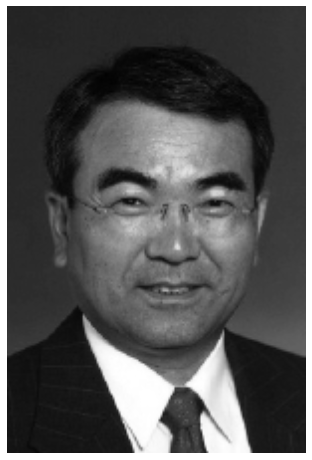

In [5]:
%matplotlib inline
# builtin asset handles both images and meshes
takeo = mio.import_builtin_asset('takeo.ppm') 
takeo.view();

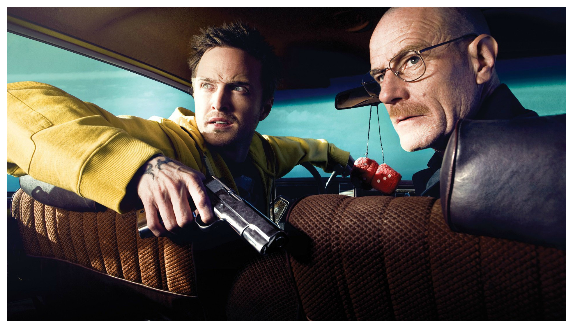

In [6]:
bb = mio.import_builtin_asset('breakingbad.jpg')
bb.view();

Note that landmark files are automatically detected by the IO module and applied to assets. For instance, the *breakingbad.jpg* had alongside it a *breakingbad.pts* file...

breaking bad assets are: ['breakingbad.jpg', 'breakingbad.pts']
LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


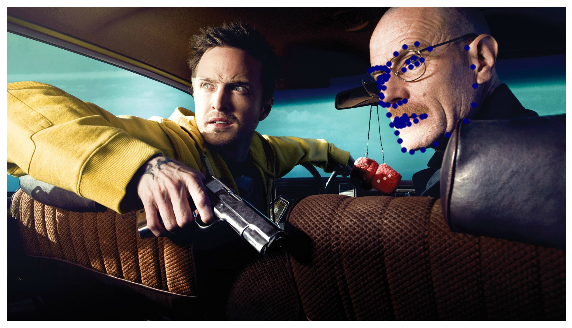

In [7]:
print('breaking bad assets are: {}'.format(
[a for a in builtin_assets if a.startswith('breakingbad')]))
print(bb.landmarks)
bb.view_landmarks()

Of course, if we were feeling more verbose we could have used the `import_image(filepath)` function having found the breaking bad image for ourselves

Walter White lives at /home/ea1812/Documents/menpo/menpo/data/breakingbad.jpg


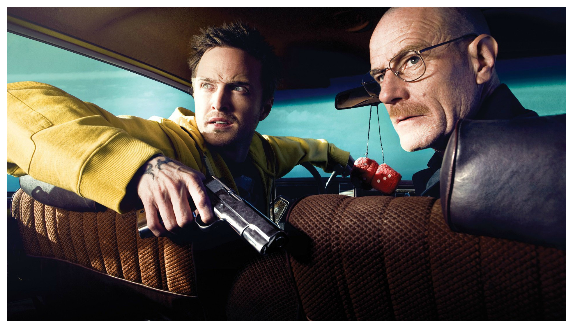

In [8]:
new_mexico = mio.data_path_to('breakingbad.jpg')
print('Walter White lives at {}'.format(new_mexico))
walter_2 = mio.import_image(new_mexico)
# exactly the same!
walter_2.view();

`import_pickle` has a similar functionality. All three importers we have looked at so far are for retrieving single items, and expect exact filepaths. If you provide an invalid path, or a path to something that can't be imported, you will get a `ValueError` explaining what went wrong

In [9]:
try:
    mio.import_image('/I/bet/this/isnt/an/image/on/your/system.jpg')
except ValueError as e:
    print(e)

/I/bet/this/isnt/an/image/on/your/system.jpg is not a file


**Multi Asset importers**


The final three `import_*` functions are the bulk importers. All three are **generators**, which means they *yield* the files they find one at a time, and support `for` looping. All three also expect a glob pattern to match against.

In [10]:
all_data_files = str(mio.data_dir_path()) + '/*'
print('glob to find all inbuilt files: {}'.format(all_data_files))
for image in mio.import_images(all_data_files):
    print(image)

glob to find all inbuilt files: /home/ea1812/Documents/menpo/menpo/data/*
1920W x 1080H 2D Image with 3 channels
817W x 1024H 2D Image with 1 channel
512W x 512H 2D Image with 3 channels
153W x 200H 2D Image with 3 channels
150W x 225H 2D Image with 3 channels
940W x 940H 2D Image with 3 channels


Note that as we used `import_images()` all images in the data folder were returned to us one by one. If we want to get them all we can wrap the generator in a list constructor

In [11]:
images = list(mio.import_images(all_data_files))
for image in images:
    print(image)

1920W x 1080H 2D Image with 3 channels
817W x 1024H 2D Image with 1 channel
512W x 512H 2D Image with 3 channels
153W x 200H 2D Image with 3 channels
150W x 225H 2D Image with 3 channels
940W x 940H 2D Image with 3 channels


Or we can use the generator to be selective on import. Often when importing large datasets of images we want to crop all the images in some way. It would be problematic to import all the images into memory at maximum size and then crop them en masse. With the generator we can crop as we go, and keep memory usage low 

In [12]:
cropped_images = []
for image in mio.import_images(all_data_files):
    image.crop((0, 0), (100, 100))
    cropped_images.append(image)
for image in cropped_images:
    print(image)

1920W x 1080H 2D Image with 3 channels
817W x 1024H 2D Image with 1 channel
512W x 512H 2D Image with 3 channels
153W x 200H 2D Image with 3 channels
150W x 225H 2D Image with 3 channels
940W x 940H 2D Image with 3 channels


Of course, `import_landmark_files()` follows exactly the same rules

In [13]:
for l in mio.import_landmark_files(all_data_files):
    print(l)

LandmarkGroup: n_labels: 1, n_points: 68
LandmarkGroup: n_labels: 1, n_points: 68
LandmarkGroup: n_labels: 7, n_points: 68
LandmarkGroup: n_labels: 1, n_points: 68
LandmarkGroup: n_labels: 1, n_points: 19
